In [1]:
import pandas as pd
import numpy as np
import os
import keras
import matplotlib.pyplot as plt
from keras.layers import Dense, Flatten
from keras.applications import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.optimizers import Adam
from PIL import ImageFile
from PIL import Image

Using TensorFlow backend.


In [1]:
train_dir='/data/Training/'
test_dir='/data/Testing/'

In [0]:
gambar_baris=224
gambar_kolom=224

base_model=VGG16(weights='imagenet',include_top=False, input_shape=(gambar_baris,gambar_kolom,3))

x=base_model.output
x=Flatten()(x)
x=Dense(4096,activation='relu')(x)
x=Dense(4096,activation='relu')(x)
preds=Dense(3,activation='softmax')(x)

ImageFile.LOAD_TRUNCATED_IMAGES = True
Image.MAX_IMAGE_PIXELS=None

In [4]:
model=Model(inputs=base_model.input,outputs=preds)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [0]:
for layer in model.layers[:18]:
    layer.trainable=False
for layer in model.layers[18:]:
    layer.trainable=True

In [6]:
train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen=ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(224, 224),
        batch_size=20,
        class_mode='categorical',
        shuffle=True)

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(224, 224),
        batch_size=20,
        class_mode='categorical',
        shuffle=True)

Found 9560 images belonging to 3 classes.
Found 15 images belonging to 3 classes.


In [7]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=20,
      validation_data=test_generator,
      validation_steps=25,  # 1000 images = batch_size * steps
      verbose=2)

Epoch 1/20


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:872: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


 - 96s - loss: 7.9324 - acc: 0.5065 - val_loss: 3.2236 - val_acc: 0.8000
Epoch 2/20
 - 80s - loss: 7.8979 - acc: 0.5100 - val_loss: 3.2236 - val_acc: 0.8000
Epoch 3/20
 - 74s - loss: 8.0590 - acc: 0.5000 - val_loss: 3.2236 - val_acc: 0.8000
Epoch 4/20
 - 89s - loss: 7.6319 - acc: 0.5265 - val_loss: 3.2236 - val_acc: 0.8000
Epoch 5/20
 - 75s - loss: 7.5352 - acc: 0.5325 - val_loss: 3.2236 - val_acc: 0.8000
Epoch 6/20
 - 79s - loss: 8.1155 - acc: 0.4965 - val_loss: 3.2236 - val_acc: 0.8000
Epoch 7/20
 - 105s - loss: 7.4546 - acc: 0.5375 - val_loss: 3.2236 - val_acc: 0.8000
Epoch 8/20
 - 73s - loss: 7.9301 - acc: 0.5080 - val_loss: 3.2236 - val_acc: 0.8000
Epoch 9/20
 - 80s - loss: 7.9462 - acc: 0.5070 - val_loss: 3.2236 - val_acc: 0.8000
Epoch 10/20
 - 87s - loss: 7.7125 - acc: 0.5215 - val_loss: 3.2236 - val_acc: 0.8000
Epoch 11/20
 - 74s - loss: 7.7447 - acc: 0.5195 - val_loss: 3.2236 - val_acc: 0.8000
Epoch 12/20
 - 79s - loss: 7.6722 - acc: 0.5240 - val_loss: 3.2236 - val_acc: 0.8000

Text(0.5, 1.0, 'Akurasi Training dan validasi')

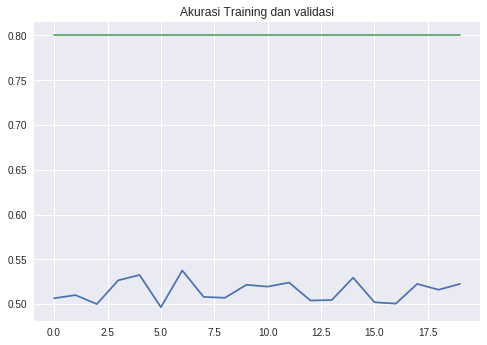

In [8]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Akurasi Training dan validasi')

In [0]:
model.save('classifier.h5')

In [0]:
lokasi = 'Prediksi/img5.jpg' #Diisi gambar yang ingin diprediksi
img = image.load_img(lokasi, target_size=(gambar_baris, gambar_kolom))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
prediksi = model.predict(x)
print(prediksi)